### We have to predict the house price - Boston DataSet

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv("boston.csv")
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [9]:
data = data.drop('Unnamed: 0',axis =1)

In [10]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### 1. CRIM

Full form: Per capita crime rate by town.

Meaning: The number of crimes per person in the town. Higher values → higher crime rate.

Impact: High crime usually decreases housing prices.

2. ZN

Full form: Proportion of residential land zoned for lots over 25,000 sq.ft.

Meaning: Percentage of land reserved for large residential plots.

Impact: Higher values suggest more spacious housing areas → prices tend to be higher.

3. INDUS

Full form: Proportion of non-retail business acres per town.

Meaning: Percentage of land used for industries.

Impact: Higher industrial land proportion often lowers housing prices.

4. CHAS

Full form: Charles River dummy variable (1 = tract bounds river; 0 = otherwise).

Meaning: Whether the property is near the Charles River.

Impact: Houses near the river (CHAS = 1) generally cost more.

5. NOX

Full form: Nitric oxide concentration (parts per 10 million).

Meaning: Measure of air pollution.

Impact: Higher NOX = more pollution → lower housing prices.

6. RM

Full form: Average number of rooms per dwelling.

Meaning: Average room count of houses in that area.

Impact: More rooms = bigger houses → higher price.

7. AGE

Full form: Proportion of owner-occupied units built before 1940.

Meaning: Share of older houses in the town.

Impact: High values = older houses, sometimes cheaper (but can vary with location).

8. DIS

Full form: Weighted distances to five Boston employment centers.

Meaning: Average distance to job centers.

Impact: Closer to jobs = higher housing prices.

9. RAD

Full form: Index of accessibility to radial highways.

Meaning: How well-connected the area is to highways.

Impact: Higher accessibility usually increases property value.

10. TAX

Full form: Full-value property-tax rate per $10,000.

Meaning: Local property tax rate.

Impact: Higher taxes may lower house prices.

11. PTRATIO

Full form: Pupil–teacher ratio by town.

Meaning: Number of students per teacher in schools.

Impact: Lower ratio (better education quality) → higher housing prices.

12. B

Formula: 
1000
×
(
1
−
0.63
2
)
1000×(1−0.63
2
) where 
Bk
Bk is the proportion of Black residents by town.

Meaning: A somewhat controversial proxy for racial diversity (outdated).

Impact: Historically used, but today considered socially inappropriate.

13. LSTAT

Full form: % lower status population.

Meaning: Percentage of residents with lower socioeconomic status.

Impact: Higher LSTAT → lower housing prices.

14. Price (MEDV)

Full form: Median value of owner-occupied homes (in $1000s).

Meaning: Target variable (the price we want to predict).

Impact: This is the output in regression tasks.

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
data.shape

(506, 14)

In [14]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Data Cleaning is not required here

# Single Linear Regerssion for one variable and Target

### Now we are going to do Linear Regerssion with 1 variable -> Ind = LSTAT and Dep = Price 


In [25]:
df_1data = data[['LSTAT','Price']]
df_1data .head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### find the relation b/w to one variable and target suing SCATTER PLOT

<Axes: xlabel='LSTAT', ylabel='Price'>

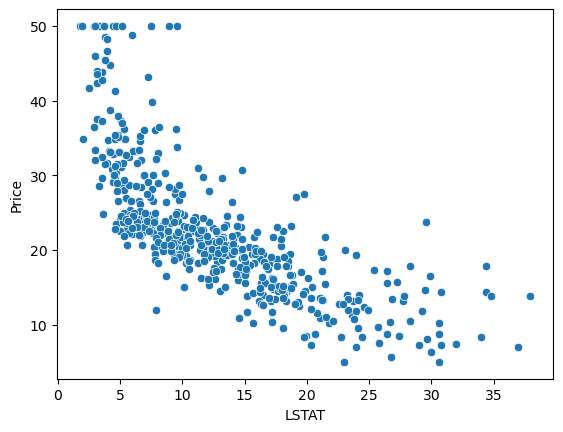

In [27]:
sns.scatterplot(x= data.LSTAT,y=data.Price)

### Segregating the Dependant and Independant Variables


In [28]:

X = pd.DataFrame(df_1data['LSTAT'])
y = pd.DataFrame(df_1data['Price'])

#### Devide the dataset into train & test

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(f"X Train Shape is :{X_train.shape}")
print(f"y Train Shape is : {y_train.shape}")
print("-"*30)
print(f"X Test Shape is : {X_test.shape}")
print(f"y Test Shape is : {y_test.shape}")

X Train Shape is :(404, 1)
y Train Shape is : (404, 1)
------------------------------
X Test Shape is : (102, 1)
y Test Shape is : (102, 1)


### Create The Model

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model

LinearRegression()

### Fit the model - > Linear Regression

#### “fit” = train the model on given data

In [39]:
model.fit(X_train,y_train) # finding the pattern

LinearRegression()

### coefficent or slope

In [40]:
print(model.coef_) # coefficent/slope

[[-0.9665309]]


#### why its negative value because its negative slope m =-0.9665309

### Intrecept or constant

In [41]:
print(model.intercept_)

[34.83694982]


### Predictions we have the coefficent and we have the intercept

In [43]:
y_pred = model.predict(X_test) # only pass the X_test
# y_test are not going to give beacuse 
#if you give the y_test already giving the actual value you need to test
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [44]:
y_pred

,Predicted
0,26.099510
1,31.425096
2,17.371736
3,29.501699
4,18.144961
...,...
97,1.617283
98,17.391067
99,14.327164
100,22.407362


### How do you know our predicted model is good or bad

#### we learned about 3 errors
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R squared
- Adj R Squared

In [45]:
y_test # actual error 

,Price
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


#### So here Already we can see that some errors

#### Here we are going to find the errors

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


In [51]:
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(root_mean_squared_error(y_test,y_pred)))

print("R Squared :",r2_score(y_test,y_pred))

Mean Absolute Error : 4.184807930623361
Mean Squared Error : 33.51954917268488
Root Mean Squared Error : 2.4061602183547923
R Squared : 0.5429180422970386


# Multiple Linear Regerssion

#### same way what we done in one feature only thing is segregate portion

In [70]:
X = pd.DataFrame(data.iloc[:,:-1])  # data.drop('Price',axis =1)
y = pd.DataFrame(data.iloc[:,-1])

In [66]:
data.shape

(506, 14)

In [68]:
data.iloc[:,-1]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

### divide the dataset

In [71]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
print(f"X Train Shape is :{X_train.shape}")
print(f"y Train Shape is : {y_train.shape}")
print("-"*30)
print(f"X Test Shape is : {X_test.shape}")
print(f"y Test Shape is : {y_test.shape}")

X Train Shape is :(404, 13)
y Train Shape is : (404, 1)
------------------------------
X Test Shape is : (102, 13)
y Test Shape is : (102, 1)


### create the Model

In [73]:
lr =LinearRegression()
lr

LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
print(lr.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [76]:
print(lr.intercept_)

[30.24675099]


In [79]:
y_pred = lr.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
y_pred

,Predicted
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880
...,...
97,-0.164237
98,13.684867
99,16.183597
100,22.276220


In [80]:
y_test

,Price
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


### Errors

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


In [86]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(root_mean_squared_error(y_test,y_pred)))
print("R squared : ",r2_score(y_test,y_pred))

Mean Absolute Error :  3.189091965887843
Mean Squared Error :  24.29111947497345
Root Mean Squared Error :  4.92860218266533
R squared :  0.6687594935356329
